# Exploratory data analysis: Titanic dataset
----

The sinking of the RMS Titanic is probably the best known shipwreck in history. On the night of 14 April 1912, the "unsinkable ship" hit an iceberg in the North Atlantic Ocean and sank, killing 1502 out of 2224 passengers and crew. 

The dataset is widely available. In particular, it is used as a beginner's guide to [Kaggle](www.kaggle.com/c/titanic) competitions to get experience in machine learning.

In this notebook, we will explore the famous dataset by trying to answer the following questions.


### Questions:
- Who were the passengers?
- Which socio-economic class did they belong to?
- Where were the passengers from?
- What factors helped passengers survive the shipwreck?


### Features:
The available features are the following:

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

----
## Info about the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset
titanic_df= pd.read_csv("titanic_data.csv")

# Looking at the first few rows of the Titanic dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To see if there are missing entries, we can look at a summary of the data with the info() method.

In [2]:
# Dataset summary
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the summary above, we can tell that some entries are missing for the following features: **Age**, **Cabin**, **Embarked**. We will have to keep that in mind during our exploration. 

Now let's have a look at some statistics using the describe() method.

In [3]:
# Dataset statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A few observations:
- the **Survived** feature is either 1 (the individual survived) or 0 (they didn't survive). Here, the mean being 0.38 informs us that about 38% of people survived the sinking of the Titanic.
- the **Fare** feature takes a maximum value of 512.33. This value is a lot higher than the values corresponding to the 50% and 75% percentiles (respectively 14.45 and 31.00). It tells us that there is one or more outliers in the dataset: individuals who have bought an extremely expensive ticket.
- the **count** row of the table also shows us that there are missing values for the **Age** feature.

----
## Who were the passengers?

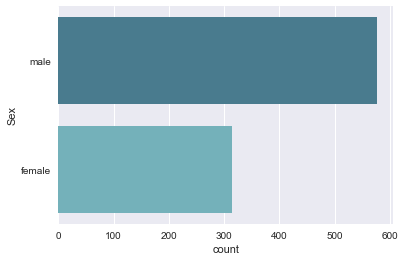

In [4]:
# Visualising the number of men and women aboard
sns.set()
gender= sns.countplot(y="Sex", data=titanic_df, palette="GnBu_d")

Perhaps unsurprisingly, there were a lot more men on board the Titanic.
Now let's see what the age distribution of passengers was like. Some **Age** values are missing: in order to plot the age distribution, we will use the dropna() method to exclude missing entries.

[(0, 80.0)]

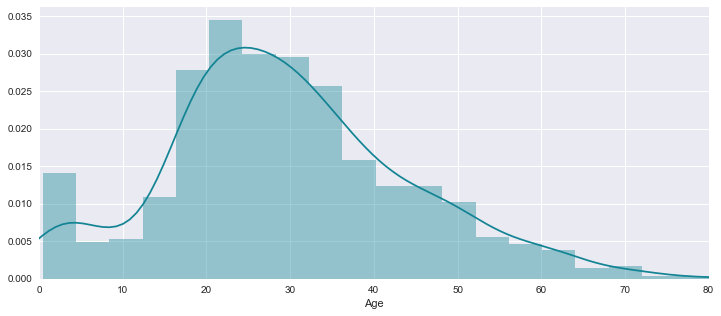

In [5]:
# Plotting the age distribution of passengers (setting xlim to 0 because no one is under 0 years of age)
plt.figure(figsize=(12, 5))
age= sns.distplot(titanic_df['Age'].dropna(), color="#128494")
age.set(xlim=(0, titanic_df["Age"].max()))

By looking at the distribution above, we can tell that many passengers were in their early twenties. We also note that there was quite a lot of children. To account for the number of children aboard, let's create a "Who" column in the dataframe to separate men, women and children. Here, an individual will be counted as a child if their age is under 16.

In [6]:
# Function to add the "Who" column to the dataframe
def who_am_i(passenger):
    age= passenger["Age"]
    sex= passenger["Sex"]
    return "child" if age<16 else sex

# Creating and filling the new column
titanic_df["Who"]= titanic_df.apply(who_am_i, axis=1)

In [7]:
# Having a look at the updated dataframe
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child


After having successfully created the "Who" column, we can have another look at the passenger numbers. This time, we have a third group corresponding to children.

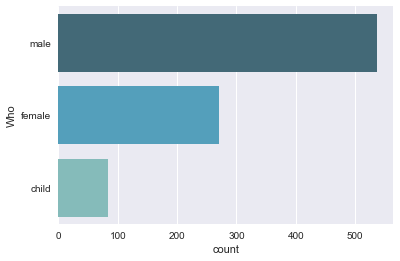

In [8]:
# Visualising the number of men, women and children on board
fig= sns.countplot(y="Who", data=titanic_df, palette="GnBu_d")

Now let's see who was travelling with their family by using the features **SibSp** (number of siblings and spouses of the passenger aboard) and **Parch** (number of parents and children of the passenger aboard).

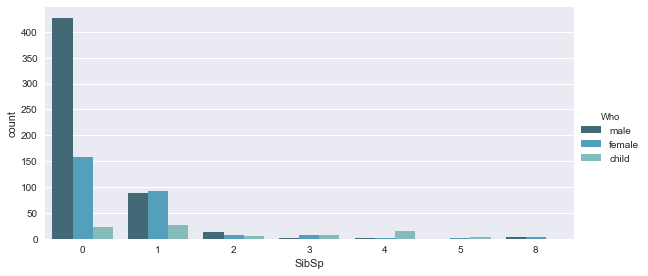

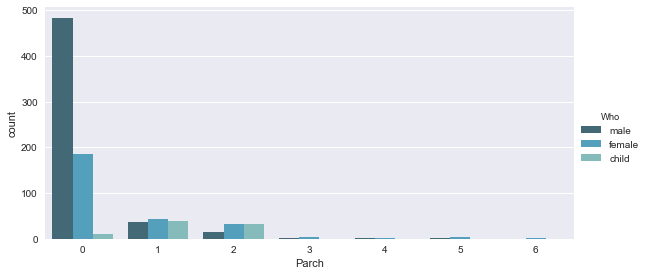

In [9]:
# Visualising the number of people travelling with family members
ax1= sns.factorplot("SibSp", data=titanic_df, hue="Who", kind="count", palette="GnBu_d", aspect=2)
ax2= sns.factorplot("Parch", data=titanic_df, hue="Who", kind="count", palette="GnBu_d", aspect=2)

The graphs above indicate that most people were not travelling with a family member. We also note that very few children were aboard without a parent. For these children, the **Parch** feature is 0 because they were actually accompanied by a nanny.

----
## Which socio-economic class did they belong to?
The feature **Pclass** is a proxy of the socio-economic class. It can take three different values, corresponding to upper, middle and lower class (1 = Upper class; 2 = Middle class; 3 = Lower class). The feature **Fare** can also be used as an indication of a passenger's wealth. Indeed, wealthy people could afford expensive tickets.
First, let's see how much a ticket was likely to have cost by using the **Fare** feature.

[(0, 512.32920000000001)]

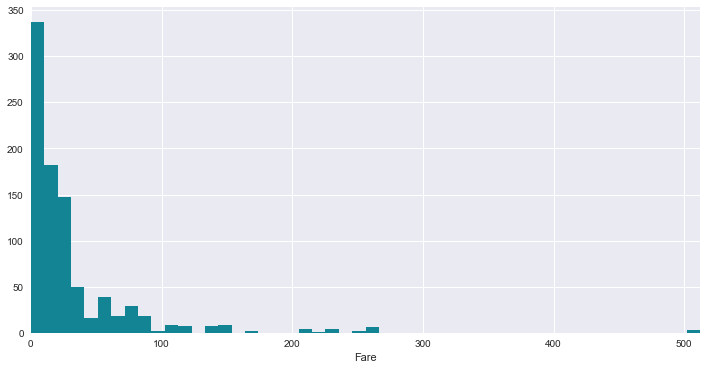

In [10]:
# Plotting the distribution of fares
plt.figure(figsize=(12, 6))
fares= sns.distplot(titanic_df['Fare'], kde=False, color="#128494", hist_kws=dict(alpha=1))
fares.set(xlim=(0, titanic_df["Fare"].max()))

The distribution shows that the majority of people paid a fare between 0 and 25 pounds. Of note, it seems that there is one or more outliers: people who paid more than 500 pounds to embark on the Titanic.
Let's see how many outliers we have in the dataset.

In [11]:
# Function to count the number of outliers = people who have paid more than 500 pounds
def big_fare(fares):
    big_fare= fares[fares>500]
    return len(big_fare)

print("Number of passengers who have paid more than 500 pounds: {}.".format(big_fare(titanic_df["Fare"])))

Number of passengers who have paid more than 500 pounds: 3.


We now know that we have three outliers. Let's create a scatterplot to have a look at their age and the class they were travelling in compared to everyone else.

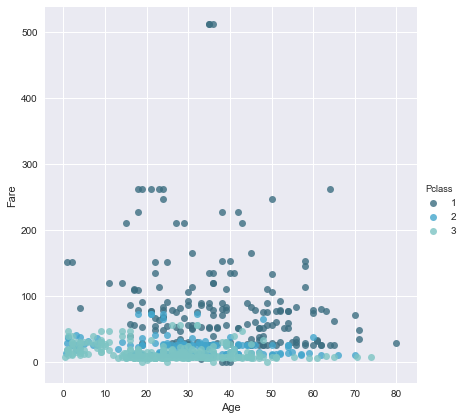

In [12]:
# Visualising the age and fare paid by passengers, separated in classes
fig= sns.lmplot(x="Age", y="Fare", hue="Pclass", data=titanic_df, fit_reg=False, palette="GnBu_d", size=6)

As expected, the three passengers who have bought such an expensive ticket were travelling in first class. The scatterplot also shows us that they were in their mid-thirties. 
Let's have a quick look at their details by extracting them from the dataframe.

In [13]:
# Details of the passengers who have paid their ticket more than 500 pounds
titanic_df[titanic_df["Fare"]>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,female
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,male
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,male


Observing the outliers data tells us that they are two men and one women. All three survived the sinking of the Titanic. Is someone who has paid a high fare more likely to have survived? We will answer that question in a moment.
For now, let's have a look at which class men, women and children were most likely to travel in.

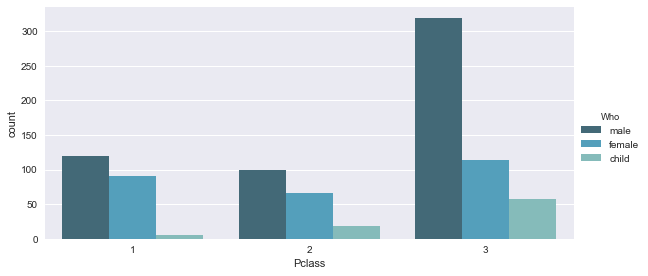

In [14]:
# Number of people travelling in each class, counted as men, women or children
fig= sns.factorplot('Pclass', data=titanic_df, hue='Who', kind='count', palette="GnBu_d", aspect=2)

The graph above shows that the vast majority of passengers were men travelling in third class. We can also tell that most children were in third class as well. 
To get an idea of the average age in each class, we can plot the age distribution in each class. 

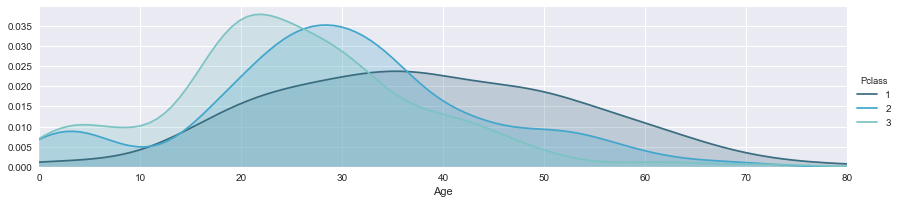

In [15]:
# Plotting the age distribution, by class
fig= sns.FacetGrid(titanic_df, hue="Pclass", aspect=4, palette="GnBu_d")
fig.map(sns.kdeplot, "Age", shade=True)
fig.set(xlim=(0, titanic_df["Age"].max()))
fig.add_legend()

The graph above is another way to visualise how children were divided among classes. As in the previous graph, we can tell that most children were travelling in second and third class. 
We also note that people in their twenties were most likely to travel in second and third class, while people in their late thirties and above were most likely to be in first class.

----
## Where were the passengers from?
By using the **Embarked** feature, we can see where the passengers were coming from.

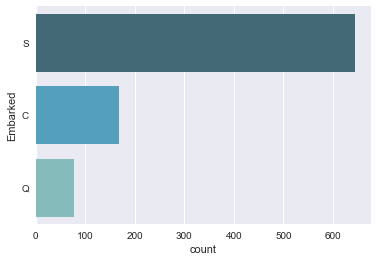

In [16]:
# Visualising the number of people who embarked at each port of embarkation
departure= sns.countplot(y="Embarked", data=titanic_df, palette="GnBu_d")

Quite clearly, most passengers embarked at Southampton. We can also calculate the percentage of people who have embarked at each port.

In [17]:
# Function to calculate the percentage of passengers per port
def percentage_embarked(port):
    port_df= titanic_df[titanic_df["Embarked"]==port]
    return len(port_df)/len(titanic_df)*100

print("The percentage of people who have embarked at Queenstown is {:0.2f}%.".format(percentage_embarked("Q")))

The percentage of people who have embarked at Queenstown is 8.64%.


By combining the features **Pclass** and **Embarked**, we can visualise the number of people travelling in each class per port of embarkation.

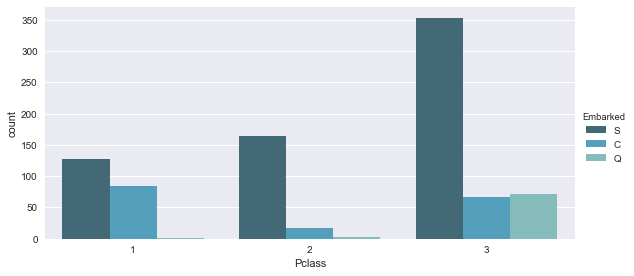

In [18]:
# Visualising the number of passengers from each port, per class
fig= sns.factorplot('Pclass', data=titanic_df, hue='Embarked', kind='count', palette="GnBu_d", aspect=2)

It seems that almost every passenger who has embarked at Queenstown was in the third class, suggesting that this area was relatively poor compared to Southampton and Cherbourg. This is even clearer on the following graph.

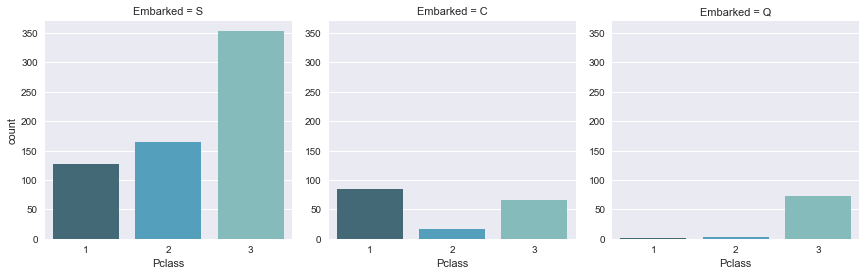

In [19]:
# Different way of representing the number of passengers from each port, per class
g= sns.factorplot(x="Pclass", col="Embarked", data=titanic_df, kind="count", palette="GnBu_d")

----
## What factors helped passengers survive the shipwreck?
We often hear "Women and children first!" in the 1997 movie, but did women and children really have more chances of surviving the sinking?

In [20]:
# Function to calculate the percentage of men, women or children who have survived
def survived_percent(who):
    survived= len(titanic_df[(titanic_df["Who"]==who)&(titanic_df["Survived"]==1)])
    total= len(titanic_df[titanic_df["Who"]==who])
    return survived/total*100

print("Percentage of female survivors: {:0.2f}%.".format(survived_percent("female")))
print("Percentage of children survivors: {:0.2f}%.".format(survived_percent("child")))
print("Percentage of male survivors: {:0.2f}%.".format(survived_percent("male")))

Percentage of female survivors: 75.65%.
Percentage of children survivors: 59.04%.
Percentage of male survivors: 16.39%.


Based on the percentages above, it seems that women and children were indeed put on the lifeboats before men. We can visualise it on the following graph.

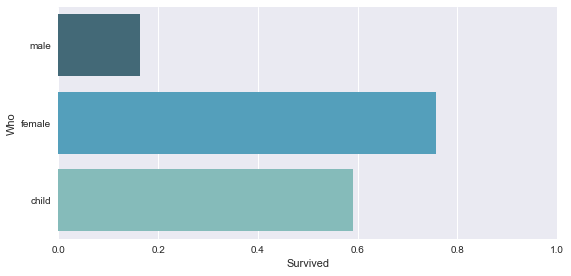

In [21]:
# Plotting survival rates for men, women and children
fig= sns.factorplot("Survived", "Who", data=titanic_df, kind="bar", ci=None, palette="GnBu_d", aspect=2)
fig.set(xlim=(0,1))

Here, a violin plot could be a good option to visualise the survival data better.

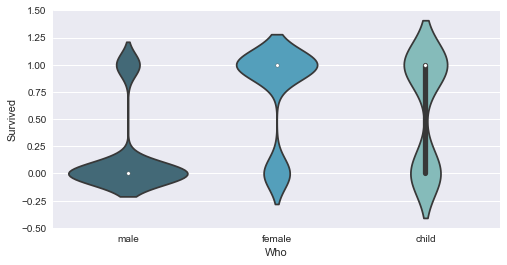

In [22]:
# Using a violin plot to observe survival rates for men, women and children
plt.figure(figsize=(8, 4))
fig= sns.violinplot("Who", "Survived", data=titanic_df, palette="GnBu_d")

Keeping in mind that the only values that the feature **Survived** takes are 0 and 1, this graph is a good way to visualise the proportion of survivors for each category. We can easily tell that the male survival rate is very low. 

Earlier, we saw that the three passengers who had bought an extremely expensive ticket had all survived. Let's see if having paid a higher fare increased one's chances.

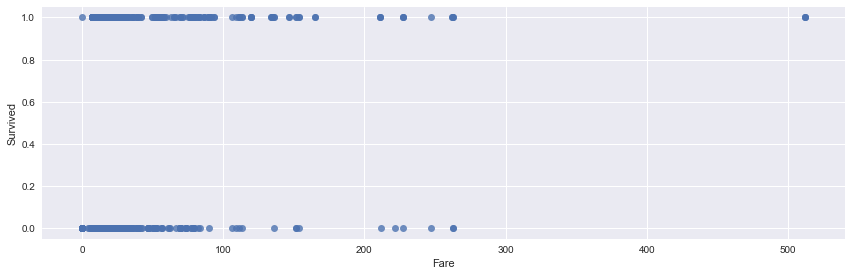

In [23]:
# Visualising the survival rate by fare
fig= sns.lmplot(x="Fare", y="Survived", data=titanic_df, fit_reg=False, palette="GnBu_d", size=4, aspect=3)

On the top right, we can see the outliers. Based on this graph, it does not look like a higher fare is linked to a better survival rate. However, the datapoints are quite close to one another so we should find another way to represent the survival rate by fare.

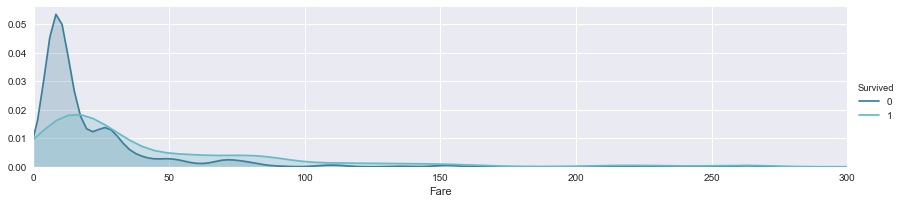

In [24]:
# Distribution of the fares up to 300 pounds, by category (survived or didn't)
fig= sns.FacetGrid(titanic_df, hue="Survived", size=3, aspect=4, palette="GnBu_d")
fig.map(sns.kdeplot, "Fare", shade=True)
fig.set(xlim=(0, 300))
fig.add_legend()

Note that, for the purpose of the graph above, we have only represented fares up to 300 pounds. This excludes the three outliers and results in distributions that look less narrow and are therefore easier to interpret. 
It seems that a lot of people who had cheap tickets have not survived. Was the class passengers were travelling in an important factor for survival?

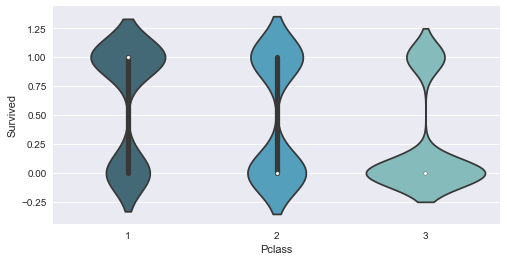

In [25]:
# Violin plot of survival rates by class
plt.figure(figsize=(8, 4))
fig= sns.violinplot("Pclass", "Survived", data=titanic_df, palette="GnBu_d")

The graph suggests that people travelling in third class were indeed less likely to survive the sinking of the Titanic. 

Finally, let's have a look at whether being accompanied increased one's chances. First, we will create a new column called Family in the dataframe where we will enter 1 if the passenger has family members aboard and 0 otherwise.

In [26]:
# Function to reflect the presence or the absence of family members aboard for each passenger
def family_aboard(passenger):
    SibSp= passenger["SibSp"]
    Parch= passenger["Parch"]
    return 1 if SibSp>0 or Parch>0 else 0

titanic_df["Family"]= titanic_df.apply(family_aboard, axis=1)

In [27]:
# Displaying the first few rows of the updated dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


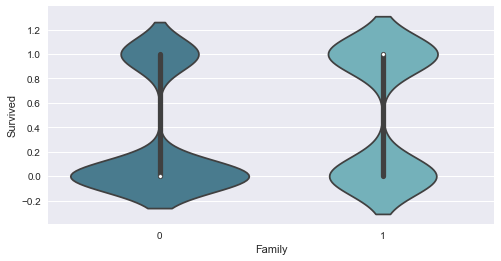

In [28]:
# Violin plot to visualise the survival rate of people on their own or not
plt.figure(figsize=(8, 4))
fig= sns.violinplot("Family", "Survived", data=titanic_df, palette="GnBu_d")

The violin plot above suggests that having one or more family members aboard increased one's chances of surviving the shipwreck.

----
## Conclusion

From this exploration of the Titanic dataset, we can conclude that being a woman or a child, travelling in first or second class and having one or more family members aboard are all factors that seem to be associated with a higher survival rate.

In another notebook, we will run machine learning algorithms on this dataset to try and predict a passenger's likelihood of surviving.